# Lybraries Import

In [105]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# Load Audio

In [106]:

audio_dir = r"D:\AI ML\Internship work\TESS Toronto emotional speech set data\OAF_angry"
audio_files = [f for f in os.listdir(audio_dir) if f.endswith(('.wav', '.mp3', '.ogg', '.flac'))]

for audio_file in audio_files:
    file_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(file_path, sr=None)
    print(f"Loaded: {audio_file} | Sample rate: {sr} | Duration: {len(audio)/sr:.2f} sec")


Loaded: OAF_back_angry.wav | Sample rate: 24414 | Duration: 1.54 sec
Loaded: OAF_bar_angry.wav | Sample rate: 24414 | Duration: 1.62 sec
Loaded: OAF_base_angry.wav | Sample rate: 24414 | Duration: 1.54 sec
Loaded: OAF_bath_angry.wav | Sample rate: 24414 | Duration: 1.61 sec
Loaded: OAF_bean_angry.wav | Sample rate: 24414 | Duration: 1.40 sec
Loaded: OAF_beg_angry.wav | Sample rate: 24414 | Duration: 1.55 sec
Loaded: OAF_bite_angry.wav | Sample rate: 24414 | Duration: 1.43 sec
Loaded: OAF_boat_angry.wav | Sample rate: 24414 | Duration: 1.33 sec
Loaded: OAF_bone_angry.wav | Sample rate: 24414 | Duration: 1.67 sec
Loaded: OAF_book_angry.wav | Sample rate: 24414 | Duration: 1.53 sec
Loaded: OAF_bought_angry.wav | Sample rate: 24414 | Duration: 1.43 sec
Loaded: OAF_burn_angry.wav | Sample rate: 24414 | Duration: 1.69 sec
Loaded: OAF_cab_angry.wav | Sample rate: 24414 | Duration: 1.46 sec
Loaded: OAF_calm_angry.wav | Sample rate: 24414 | Duration: 1.49 sec
Loaded: OAF_came_angry.wav | Sample

In [107]:
print(f"Total files loaded: {len(audio_files)}")

Total files loaded: 200


In [108]:
import pandas as pd

features = []

for audio_file in audio_files:
    file_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    features.append([audio_file] + mfccs_mean.tolist())

columns = ['filename'] + [f'mfcc_{i+1}' for i in range(13)]
df = pd.DataFrame(features, columns=columns)
print(df.head())

             filename      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  OAF_back_angry.wav -390.031342  55.235966 -15.034652 -10.704581  -6.318040   
1   OAF_bar_angry.wav -451.019470  67.048828  -0.448257 -16.812130 -14.137628   
2  OAF_base_angry.wav -406.563324  28.609009  -5.317216   2.124630  -3.238453   
3  OAF_bath_angry.wav -386.340027  53.439651  -8.663545 -13.309978  -5.566482   
4  OAF_bean_angry.wav -404.784882  54.462566   3.355291  10.967580   2.167008   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11   mfcc_12  \
0   9.424743 -20.741861 -12.001624  -7.151768  -7.919952   1.646008 -0.940951   
1  12.182583  -8.768965  -0.833088 -12.662773   1.033061  -7.188157  3.722568   
2   5.009407 -20.190369  -2.519338 -12.905816  -1.877587 -11.231725  2.015583   
3   8.417089 -18.068228 -11.134798 -10.535916  -8.044547   0.351155 -1.321829   
4   6.005213 -25.438648   4.935778 -12.994334 -16.313234 -10.588128 -5.183738   

    mfcc_13  
0  2.213203 

# MFCC from Angry Audio

In [109]:
df['label'] = 'angry'  # Ya filename se extract karen agar multiple emotions hain
print(df.head())

             filename      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  OAF_back_angry.wav -390.031342  55.235966 -15.034652 -10.704581  -6.318040   
1   OAF_bar_angry.wav -451.019470  67.048828  -0.448257 -16.812130 -14.137628   
2  OAF_base_angry.wav -406.563324  28.609009  -5.317216   2.124630  -3.238453   
3  OAF_bath_angry.wav -386.340027  53.439651  -8.663545 -13.309978  -5.566482   
4  OAF_bean_angry.wav -404.784882  54.462566   3.355291  10.967580   2.167008   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11   mfcc_12  \
0   9.424743 -20.741861 -12.001624  -7.151768  -7.919952   1.646008 -0.940951   
1  12.182583  -8.768965  -0.833088 -12.662773   1.033061  -7.188157  3.722568   
2   5.009407 -20.190369  -2.519338 -12.905816  -1.877587 -11.231725  2.015583   
3   8.417089 -18.068228 -11.134798 -10.535916  -8.044547   0.351155 -1.321829   
4   6.005213 -25.438648   4.935778 -12.994334 -16.313234 -10.588128 -5.183738   

    mfcc_13  label  
0  2.

In [110]:
df.to_csv('mfcc_features_angry.csv', index=False)

In [111]:
df_check = pd.read_csv('mfcc_features_angry.csv')
print(df_check.head())

             filename      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  OAF_back_angry.wav -390.031342  55.235966 -15.034652 -10.704581  -6.318040   
1   OAF_bar_angry.wav -451.019470  67.048828  -0.448257 -16.812130 -14.137628   
2  OAF_base_angry.wav -406.563324  28.609009  -5.317216   2.124630  -3.238453   
3  OAF_bath_angry.wav -386.340027  53.439651  -8.663545 -13.309978  -5.566482   
4  OAF_bean_angry.wav -404.784882  54.462566   3.355291  10.967580   2.167008   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11   mfcc_12  \
0   9.424743 -20.741861 -12.001624  -7.151768  -7.919952   1.646008 -0.940951   
1  12.182583  -8.768965  -0.833088 -12.662773   1.033061  -7.188157  3.722568   
2   5.009407 -20.190369  -2.519338 -12.905816  -1.877587 -11.231725  2.015583   
3   8.417089 -18.068228 -11.134798 -10.535916  -8.044547   0.351155 -1.321829   
4   6.005213 -25.438648   4.935778 -12.994334 -16.313234 -10.588128 -5.183738   

    mfcc_13  label  
0  2.

In [112]:
import IPython
IPython.display.FileLink('mfcc_features_angry.csv')

d:\AI ML\Internship work\mfcc_features_angry.csv

# MFCC from Happy Audio

In [113]:
# Happy emotion ke liye
audio_dir = r"D:\AI ML\Internship work\TESS Toronto emotional speech set data\OAF_happy"
audio_files = [f for f in os.listdir(audio_dir) if f.endswith(('.wav', '.mp3', '.ogg', '.flac'))]



In [114]:
features = []
for audio_file in audio_files:
    file_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    features.append([audio_file] + mfccs_mean.tolist())

columns = ['filename'] + [f'mfcc_{i+1}' for i in range(13)]


In [115]:
df = pd.DataFrame(features, columns=columns)
df['label'] = 'happy'
df.to_csv('mfcc_features_happy.csv', index=False)

In [116]:
import IPython

# Happy
IPython.display.FileLink('mfcc_features_happy.csv')

d:\AI ML\Internship work\mfcc_features_happy.csv

# MFCC from Sad Audio

In [117]:
# Sad emotion ke liye
audio_dir = r"D:\AI ML\Internship work\TESS Toronto emotional speech set data\OAF_sad"
audio_files = [f for f in os.listdir(audio_dir) if f.endswith(('.wav', '.mp3', '.ogg', '.flac'))]



In [118]:
features = []
for audio_file in audio_files:
    file_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    features.append([audio_file] + mfccs_mean.tolist())



In [119]:
columns = ['filename'] + [f'mfcc_{i+1}' for i in range(13)]
df = pd.DataFrame(features, columns=columns)
df['label'] = 'sad'
df.to_csv('mfcc_features_sad.csv', index=False)

In [120]:
import IPython

# Sad
IPython.display.FileLink('mfcc_features_sad.csv')

d:\AI ML\Internship work\mfcc_features_sad.csv

# MFCC from Fear Audio

In [121]:
# Fear emotion ke liye
audio_dir = r"D:\AI ML\Internship work\TESS Toronto emotional speech set data\OAF_fear"
audio_files = [f for f in os.listdir(audio_dir) if f.endswith(('.wav', '.mp3', '.ogg', '.flac'))]



In [122]:
features = []
for audio_file in audio_files:
    file_path = os.path.join(audio_dir, audio_file)
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    features.append([audio_file] + mfccs_mean.tolist())



In [123]:
columns = ['filename'] + [f'mfcc_{i+1}' for i in range(13)]
df = pd.DataFrame(features, columns=columns)
df['label'] = 'fear'
df.to_csv('mfcc_features_fear.csv', index=False)

In [124]:
import IPython

# Fear
IPython.display.FileLink('mfcc_features_fear.csv')

d:\AI ML\Internship work\mfcc_features_fear.csv

# Load all CSV files 

In [125]:
import pandas as pd

In [126]:
# Sabhi CSV files ko load karo
df_angry = pd.read_csv('mfcc_features_angry.csv')
df_happy = pd.read_csv('mfcc_features_happy.csv')
df_sad = pd.read_csv('mfcc_features_sad.csv')
df_fear = pd.read_csv('mfcc_features_fear.csv')


# Combine all

In [127]:

df_all = pd.concat([df_angry, df_happy, df_sad, df_fear], ignore_index=True)


In [128]:
# Result dekh lo
print(df_all.head())
print(df_all['label'].value_counts())



             filename      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  OAF_back_angry.wav -390.031342  55.235966 -15.034652 -10.704581  -6.318040   
1   OAF_bar_angry.wav -451.019470  67.048828  -0.448257 -16.812130 -14.137628   
2  OAF_base_angry.wav -406.563324  28.609009  -5.317216   2.124630  -3.238453   
3  OAF_bath_angry.wav -386.340027  53.439651  -8.663545 -13.309978  -5.566482   
4  OAF_bean_angry.wav -404.784882  54.462566   3.355291  10.967580   2.167008   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11   mfcc_12  \
0   9.424743 -20.741861 -12.001624  -7.151768  -7.919952   1.646008 -0.940951   
1  12.182583  -8.768965  -0.833088 -12.662773   1.033061  -7.188157  3.722568   
2   5.009407 -20.190369  -2.519338 -12.905816  -1.877587 -11.231725  2.015583   
3   8.417089 -18.068228 -11.134798 -10.535916  -8.044547   0.351155 -1.321829   
4   6.005213 -25.438648   4.935778 -12.994334 -16.313234 -10.588128 -5.183738   

    mfcc_13  label  
0  2.

In [129]:
df_all.to_csv('mfcc_features_all.csv', index=False)



In [130]:
import IPython
IPython.display.FileLink('mfcc_features_all.csv')

d:\AI ML\Internship work\mfcc_features_all.csv

# Split Features & Labels

In [131]:
# Features: sirf MFCC columns (filename aur label ko hata dein)
X = df_all.drop(['filename', 'label'], axis=1).values



In [132]:
# Labels: sirf label column
y = df_all['label'].values

print(X.shape)
print(y.shape)

(800, 13)
(800,)


# Label Encoding

In [133]:
from sklearn.preprocessing import LabelEncoder


In [134]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [135]:

print(y[:10])         # Original labels
print(y_encoded[:10]) # Encoded labels
print(le.classes_)    # Label mapping

['angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry']
[0 0 0 0 0 0 0 0 0 0]
['angry' 'fear' 'happy' 'sad']


# Train_Test_Split

In [136]:
from sklearn.model_selection import train_test_split



In [137]:

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [138]:

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(640, 13) (160, 13)
(640,) (160,)


# Deep Learning Model Building

In [139]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical



In [140]:

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [141]:

X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [142]:

model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Subhan Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,180 (86.64 KB)

 Trainable params: 22,180 (86.64 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [144]:

history = model.fit(
    X_train_lstm, y_train_cat,
    epochs=30,
    batch_size=32,           
    validation_data=(X_test_lstm, y_test_cat)
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3703 - loss: 1.3761 - val_accuracy: 0.5813 - val_loss: 1.3290
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7344 - loss: 1.2480 - val_accuracy: 0.7750 - val_loss: 1.1658
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8313 - loss: 1.0652 - val_accuracy: 0.8562 - val_loss: 0.9548
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8906 - loss: 0.8511 - val_accuracy: 0.8875 - val_loss: 0.7657
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9328 - loss: 0.6672 - val_accuracy: 0.9312 - val_loss: 0.5949
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9438 - loss: 0.5189 - val_accuracy: 0.9250 - val_loss: 0.4594
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9594 - loss: 0.4015 - val_accuracy: 0.9438 - val_loss: 0.3615
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9625 - loss: 0.3119 - val_accuracy: 0.9563 - val_l

# Comprehensive Model Evaluation 

# 1. Predictions aur Metrics:

In [145]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np


In [146]:

# Predictions (probabilities ko class labels me convert karein)
y_pred_prob = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_prob, axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [147]:

# Accuracy, Precision, Recall, F1-Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.99375
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        40
        fear       1.00      0.97      0.99        40
       happy       0.98      1.00      0.99        40
         sad       1.00      1.00      1.00        40

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



# 2. Confusion Matrix Plot:

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt


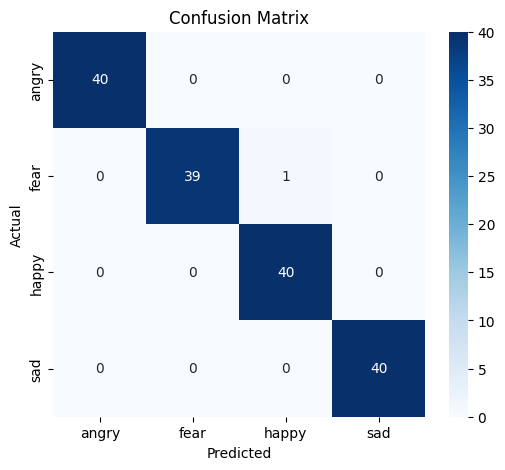

Text(0, 0.8, "Confusion Matrix:\nVisualizes the model's predictions vs actual labels for each emotion.\nDiagonal values show correct predictions;\noff-diagonal values show misclassifications.")

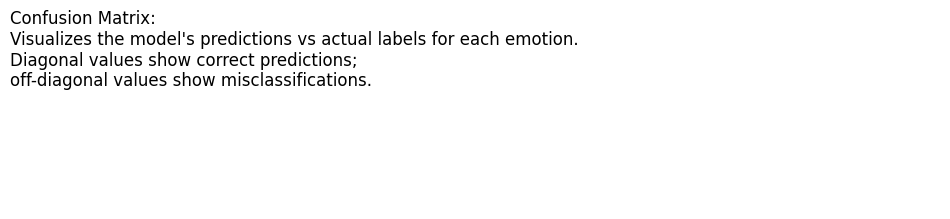

In [149]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12,2))
plt.axis('off')
plt.text(
    0, 0.8,
    "Confusion Matrix:\n"
    "Visualizes the model's predictions vs actual labels for each emotion.\n"
    "Diagonal values show correct predictions;\n"
    "off-diagonal values show misclassifications.",
    fontsize=12
)

# 3. Training History Plot:

Text(0, 0.8, 'Accuracy Plot:\nShows how well the model is learning and generalizing.\nIf train and validation accuracy are close and high,\nthe model is performing well.')

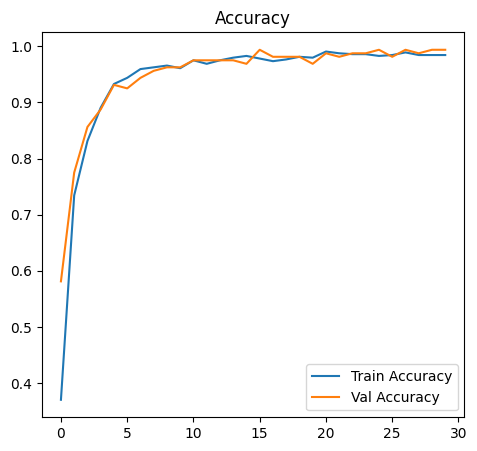

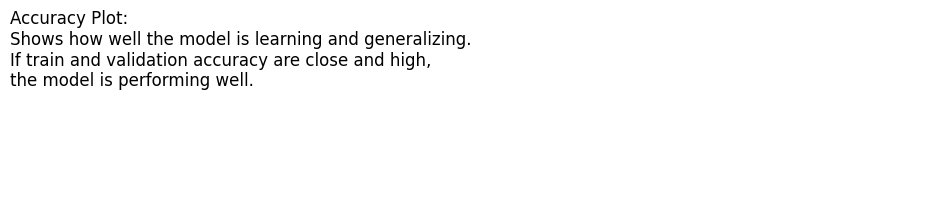

In [150]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')


plt.figure(figsize=(12,2))
plt.axis('off')
plt.text(
    0, 0.8,
    "Accuracy Plot:\n"
    "Shows how well the model is learning and generalizing.\n"
    "If train and validation accuracy are close and high,\n"
    "the model is performing well.",
    fontsize=12
)



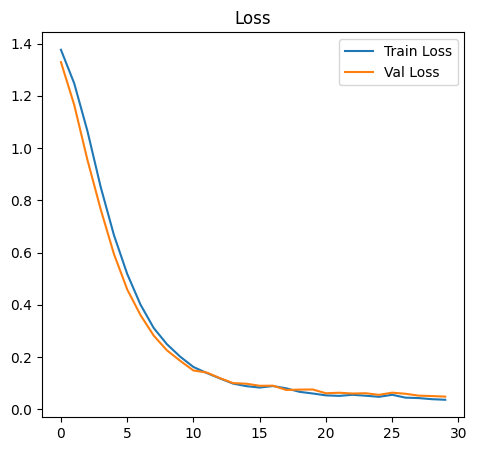

Text(0, 0.8, 'Loss Plot:\nDisplays the training and validation loss.\nIf both losses decrease and stay low, the model is learning correctly.\nLarge gaps may indicate overfitting.')

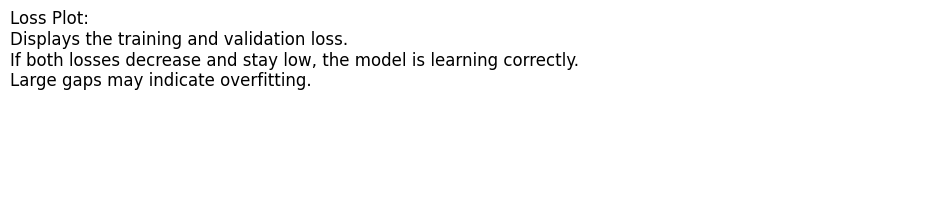

In [151]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


plt.figure(figsize=(12,2))
plt.axis('off')
plt.text(
    0, 0.8,
    "Loss Plot:\n"
    "Displays the training and validation loss.\n"
    "If both losses decrease and stay low, the model is learning correctly.\n"
    "Large gaps may indicate overfitting.",
    fontsize=12
)
